In [5]:

from rur import uri
from rur import painter
from rur import uhmi
import numpy as np
import matplotlib.pyplot as plt

# /storage6/NewHorizon/snapshots


In [6]:
nout = 970

nh1 = uri.RamsesSnapshot(repo='/storage6/NewHorizon', path_in_repo='snapshots', iout=nout, mode='nh')
snap = nh1
boxtokpc = snap.params['boxlen']*snap.params['unit_l']/snap.unit['kpc']
gals, pids = uhmi.HaloMaker.load(nh1,galaxy=True, double_precision=True, load_parts=True)
print('# gals :',len(gals['id']))
print('particle ids :', pids)
nparts = gals['nparts']
nparts = np.cumsum(nparts)
nparts = np.insert(nparts, 0, 0)


def find_part(gal,pids,nparts=None)
    gid = gal['id']
    idx1, idx2 = nparts[gid-1], nparts[gid]
    return pids[idx1:idx2]

target = gals[1]
print(target['id'])
target_pids = find_part(target,pids,nparts=nparts)

print('galaxy mass',target['m'])

Age of the universe (now/z=0): 11.204 / 13.741 Gyr, z = 0.21084 (a = 0.8259)
# gals : 5434
particle ids : [        1         2         3 ... 337681267 337681877 337682135]
2
galaxy mass 171724000154.09174


In [3]:
print(gals.dtype.names)

('nparts', 'id', 'timestep', 'level', 'host', 'hostsub', 'nbsub', 'nextsub', 'aexp', 'm', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'Lx', 'Ly', 'Lz', 'r', 'a', 'b', 'c', 'ek', 'ep', 'et', 'spin', 'sigma', 'sigma_bulge', 'm_bulge', 'rvir', 'mvir', 'tvir', 'cvel', 'rho0', 'rc')


In [4]:
cmtokpc = 3.24078e-22
gramtosolarmass = 5.0279e-34
boxtokpc = snap.params['boxlen']*snap.params['unit_l'] * cmtokpc

1.0
3.61319553163205e+26
117095.71815002515
2.1222976775129353e+50


In [5]:
snap.set_box_halo(halo=target)
snap.get_part()
star = snap.part['star']

print(star.dtype)
print(snap.params['age'])

Reading 224 part files (2.240 GiB) in /storage6/NewHorizon/snapshots/output_00970... 
Done (6.681s).
Building table for 30059312 particles... 
Done (9.834s).
Masking particles... 28528848 / 30059312 (0.9491)
Done (2.555s).
(numpy.record, [('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('vx', '<f8'), ('vy', '<f8'), ('vz', '<f8'), ('m', '<f8'), ('epoch', '<f8'), ('metal', '<f8'), ('id', '<i4'), ('level', 'u1'), ('cpu', '<i4')])
11.203655098256423


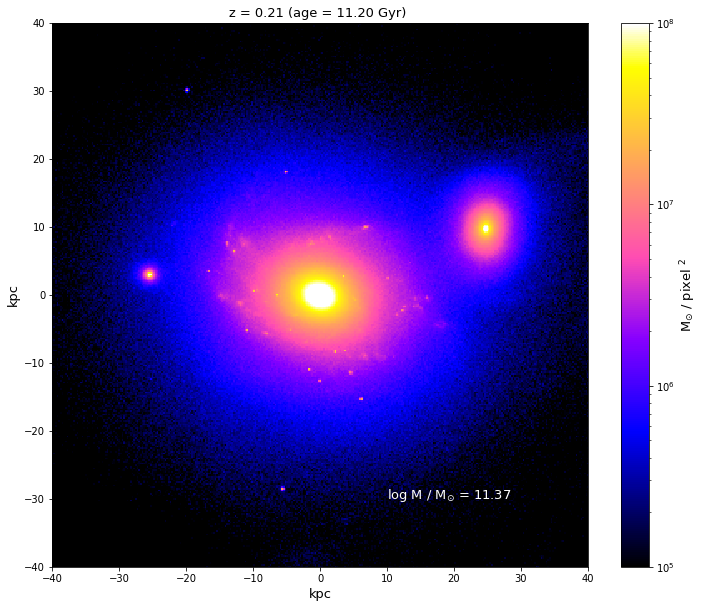

In [24]:
import matplotlib as mpl

x = star['x'] * boxtokpc
y = star['y'] * boxtokpc
z = star['z'] * boxtokpc
vx = star['vx']
vy = star['vy']
vz = star['vz']
v3d = np.sqrt(vx**2 + vy**2 +vz **2)
mass = star['m'] * snap.params['unit_m'] * gramtosolarmass
metal = star['metal']

Gal_StellarMass = np.sum(mass)
age = snap.params['age']
Redshift = snap.params['z']

x_shifted = (x - (np.min(x) + np.max(x))/2) 
y_shifted = (y - (np.min(y) + np.max(y))/2) 
z_shifted = (z - (np.min(z) + np.max(z))/2)

plt.figure(figsize=(12,10))
plt.hist2d(x_shifted,y_shifted,norm=mpl.colors.LogNorm(),bins=1000,cmap='gnuplot2',weights=mass)
plt.gca().set_facecolor('black')
cbar = plt.colorbar()
cbar.set_label('M$_{\odot}$ / pixel $^2$',size=13)
plt.xlabel('kpc',size=13)
plt.ylabel('kpc',size=13)
plt.xlim(-40,40)
plt.ylim(-40,40)
plt.clim(1e5,1e8)
#plt.savefig('GalDmapXZ.png')
plt.title('z = %.2f (age = %.2f Gyr) '%(Redshift,age),size=13)
plt.text(10,-30,'log M / M$_{\odot}$ = %.2f' %np.log10(Gal_StellarMass), color = 'white',size=13)
plt.show()

In [7]:
Gal_StellarMass = np.sum(mass)
print(Gal_StellarMass)

#plt.savefig('GalDmap.png')

236115985802.49863


(3, 26496568)
124.22716060096522


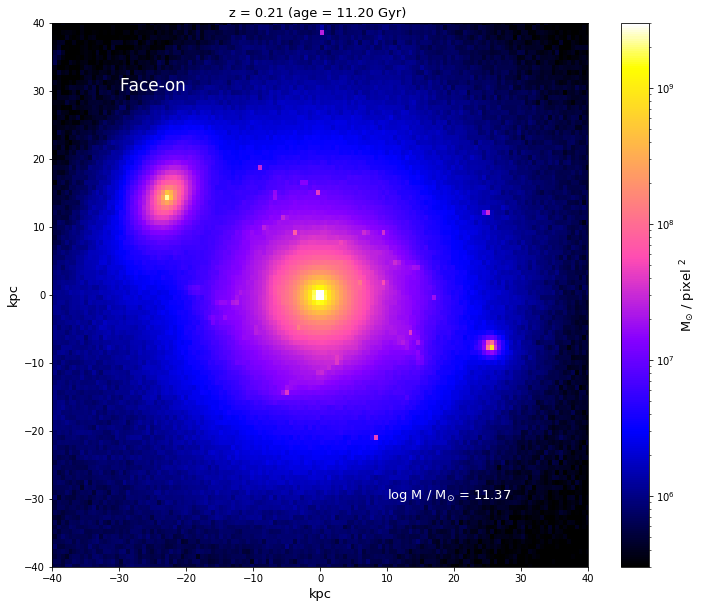

In [8]:
r = np.array([x_shifted,y_shifted,z_shifted])
print(r.shape)
L = np.array([target['Lx'],target['Ly'],target['Lz']])

e_x = np.array([1,0,0])
e_y = np.array([0,1,0])
e_z = np.array([0,0,1])

yprime = np.array([L[0],L[1],0])

cosphi = np.inner(e_y,yprime)/(np.linalg.norm(e_y)*np.linalg.norm(yprime))
sinphi = np.sqrt(1-cosphi**2)
rotmat1 = np.array([cosphi,sinphi,0,-sinphi,cosphi,0,0,0,1]).reshape(3,3)

costheta = np.inner(e_z,L)/(np.linalg.norm(e_z)*np.linalg.norm(L))
theta = 2*np.pi - np.arccos(costheta)
sintheta = np.sin(theta)
rotmat2 = np.array([1,0,0,0,costheta,sintheta,0,-sintheta,costheta]).reshape(3,3)

posirot1 = (np.matmul(rotmat1,r))
posirot2 = np.matmul(rotmat2,posirot1)

plt.figure(figsize=(12,10))
plt.hist2d(posirot2[0],posirot2[1],norm=mpl.colors.LogNorm(),bins=500,cmap='gnuplot2',weights=mass)
plt.gca().set_facecolor('black')
cbar = plt.colorbar()
cbar.set_label('M$_{\odot}$ / pixel $^2$',size=13)
plt.xlabel('kpc',size=13)
plt.ylabel('kpc',size=13)
plt.xlim(-40,40)
plt.ylim(-40,40)
plt.clim(3e5,3e9)
#plt.savefig('GalDmapXZ.png')
plt.title('z = %.2f (age = %.2f Gyr) '%(Redshift,age),size=13)
plt.text(10,-30,'log M / M$_{\odot}$ = %.2f' %np.log10(Gal_StellarMass), color = 'white',size=13)
plt.text(-30,30,'Face-on',color='white',size=17)
print(target['rvir']*boxtokpc)
#circle = plt.Circle((0,0),target['rvir']*boxtokpc,color='yellow',fill=False)
#plt.gca().add_patch(circle)

plt.savefig('FaceOnimage.png')
plt.show()


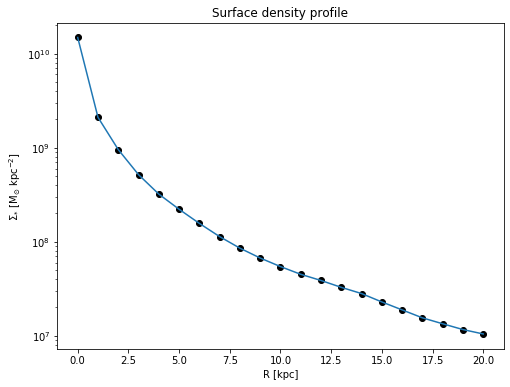

In [9]:
surfacedensity = []

for i in range(0,21):
    radius = np.sqrt(posirot2[0]**2 + posirot2[1]**2)
    ring_mask = (radius >= i) & (radius < i+1)
    annulus = np.pi *((i+1)**2-i**2)
    surfacedensity.append(np.sum(mass[ring_mask])/annulus)


ax = plt.figure(figsize=(8,6))
plt.scatter(np.arange(0,21),surfacedensity,color='black')
plt.plot(np.arange(0,21),surfacedensity)
plt.yscale('log')
plt.title('Surface density profile')
plt.ylabel('$\Sigma_{*}$ [M$_{\odot}$ kpc$^{-2}$]')
plt.xlabel('R [kpc]')
plt.show()
ax.savefig('SurfaceDensityProfile.png')

In [10]:
print(dir(snap.part))
print(type(snap.part))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'snap', 'table']
<class 'rur.uri.RamsesSnapshot.Particle'>
